<span>
<img src="http://ndlib.readthedocs.io/en/latest/_static/ndlogo2.png" width="260px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>NDlib version:</b>  5.1.0<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 14: Opinion Dynamics*

In this notebook are introduced basilar versions of opinion dynamic models: for more advanced customizations refer to the ``NDlib`` documentation/appendix notebook.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

## Table of Contents

1. [Opinion Dynamic models](#workflow)
    1. [Discrete Opinion Models](#discrete)
    2. [Continuos Opinion Models](#continuos)
2. [Available Opinion Dynamic models](#models)

In [1]:
import ndlib

<a id='workflow'></a>
## Opinon Dynamic models ([to top](#top))

Models op opinion evolution in a population.

Opinions are at the base of human behaviour, models are devised to:
- understand behaviour: which mechanisms are important?
- trigger changes in behaviour: study intervention methods to foster/reduce spreading

In [2]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

g = nx.complete_graph(100)

<a id="discrete"></a>
## Discrete Opinion models ([to top](#top))

Agents opinions vary in the discrete set [0, 1]

<a id="voter"></a>
### Voter Model ([to top](#top))

Originally introduced to analyse competition of species, then applied to electoral competitions.

Discrete opinions: {-1, 1}

Iteration:
- A random agent i is selected with one of its neighbors j
- i takes j’s opinion


In [3]:
model = op.VoterModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

100%|██████████| 1000/1000 [00:00<00:00, 18971.80it/s]


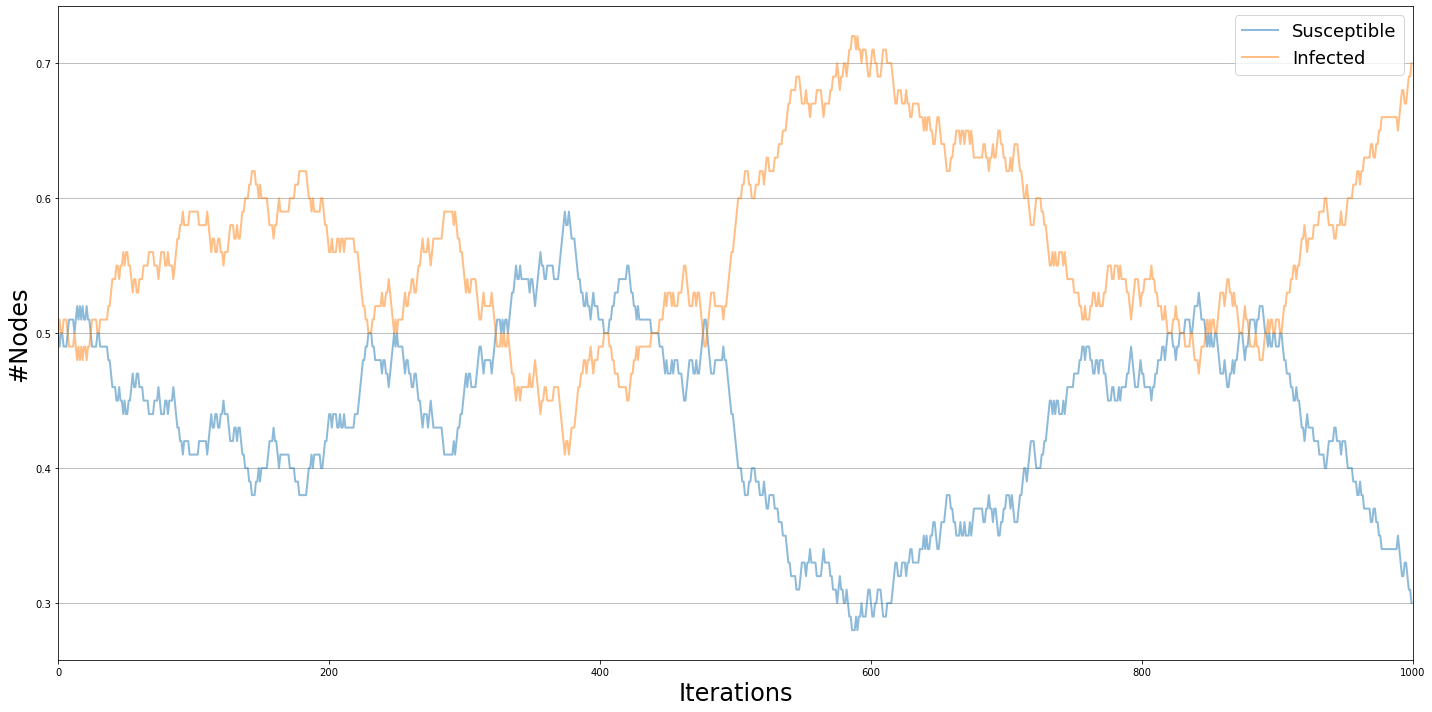

In [4]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="majority"></a>
### Majority Rule ([to top](#top))

Originally introduced to describe public debates (e.g., global warming, H1N1 pandemic).

Discrete opinions: {-1, 1}

Iteration:
- A random group of r agents is selected
- The agents take the majority opinion within the group

**r odd:**  majority always exists

**r even:** possibility of tied configurations. To address them, bias toward an opinion is introduced (social inertia)


In [5]:
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:00<00:00, 13345.76it/s]


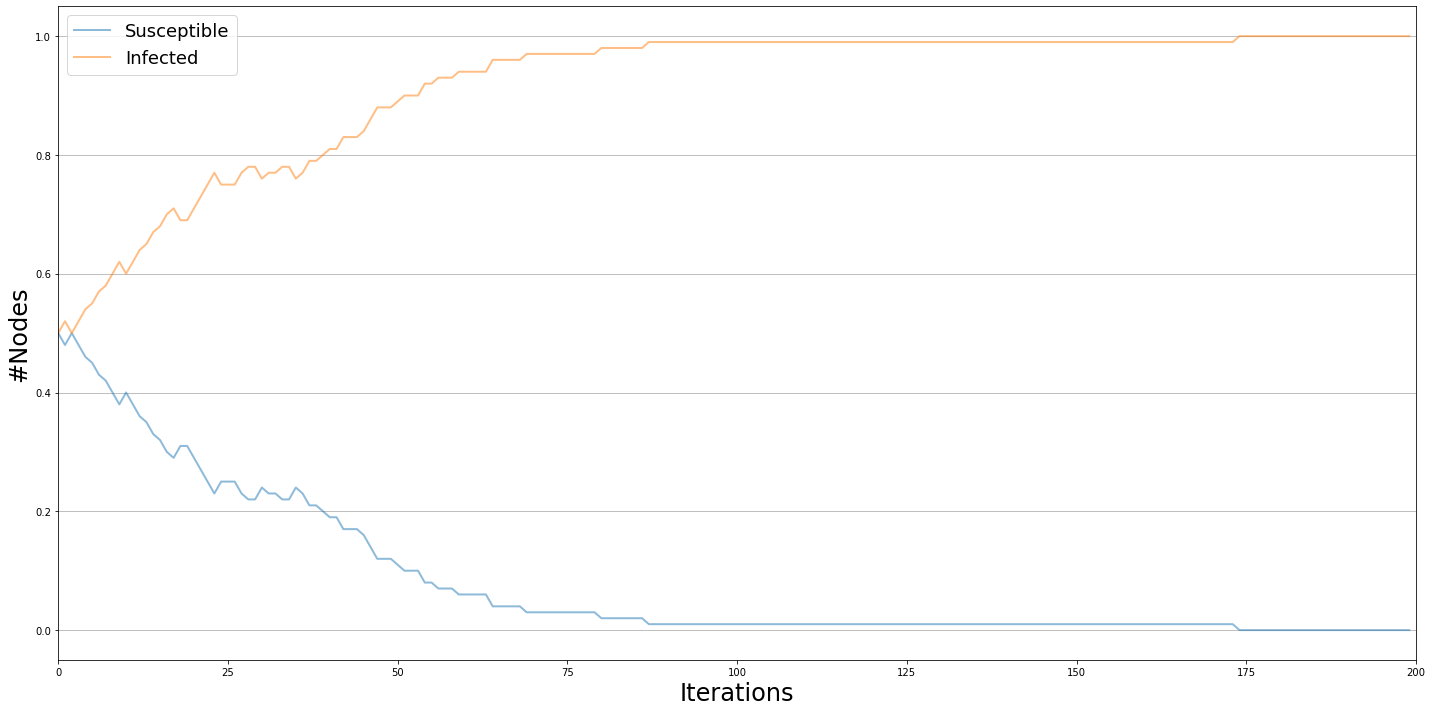

In [6]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="sznajd"></a>
### Sznajd ([to top](#top))

A group of individuals having the same opinion can influence their neighbors more than a single individual

Discrete opinions: {-1, 1}

Iteration:
- A random agent i is selected with one of its neighbors j
- if i and j opinions coincide all their neighbors take that opinion, otherwise the neighbors take contrasting opinions

The model converge to one of the two contrasting stationary states


In [7]:
model = op.SznajdModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(10)
trends = model.build_trends(iterations)

100%|██████████| 10/10 [00:00<00:00, 5423.20it/s]


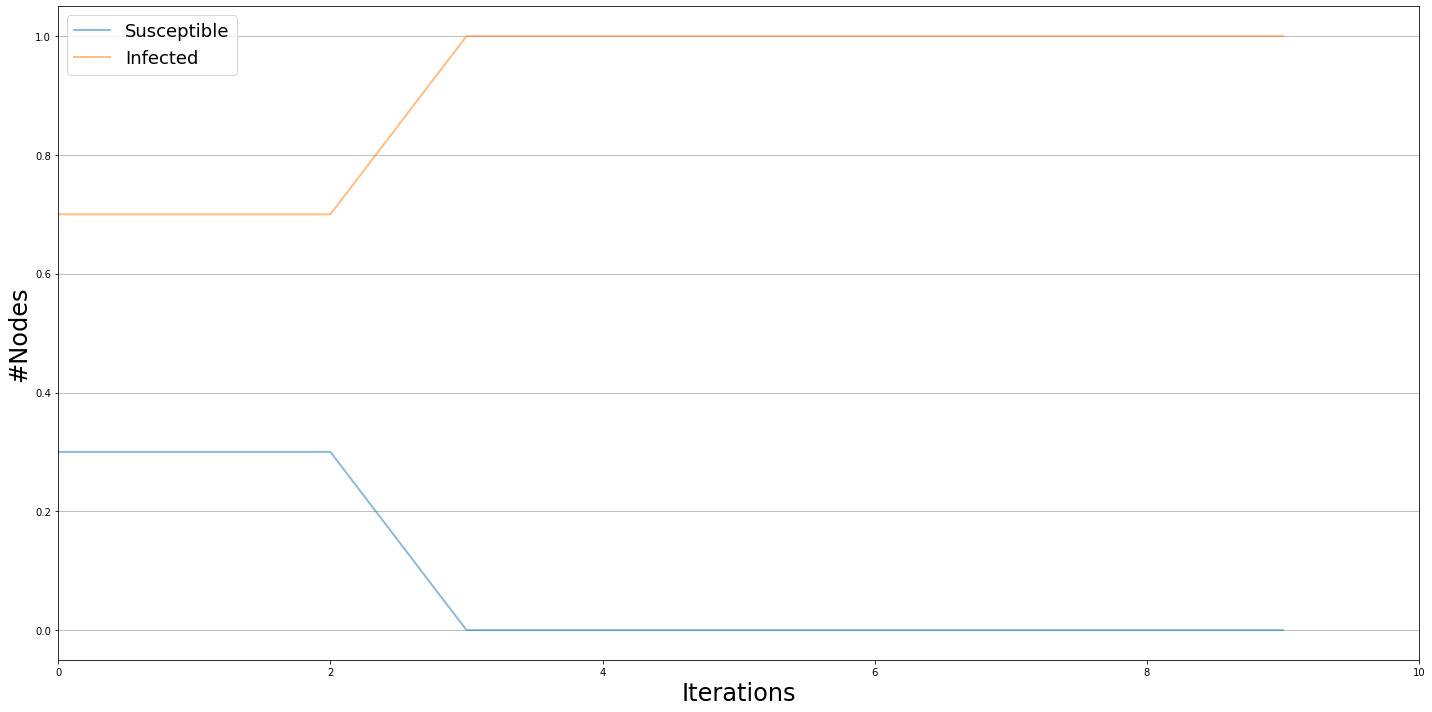

In [8]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="qvoter"></a>
### Q-Voter ([to top](#top))

Generalization of the Voter and Sznajd models

Discrete opinions: {-1, 1}

Iteration:
- q neighbours are chosen and, if they agree, they influence one neighbour chosen at random
- If the group does not agree, the agent flips its opinion with probability ε

In [9]:
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 5)
config.add_model_parameter('fraction_infected', 0.3)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(600)
trends = model.build_trends(iterations)

100%|██████████| 600/600 [00:00<00:00, 12440.59it/s]


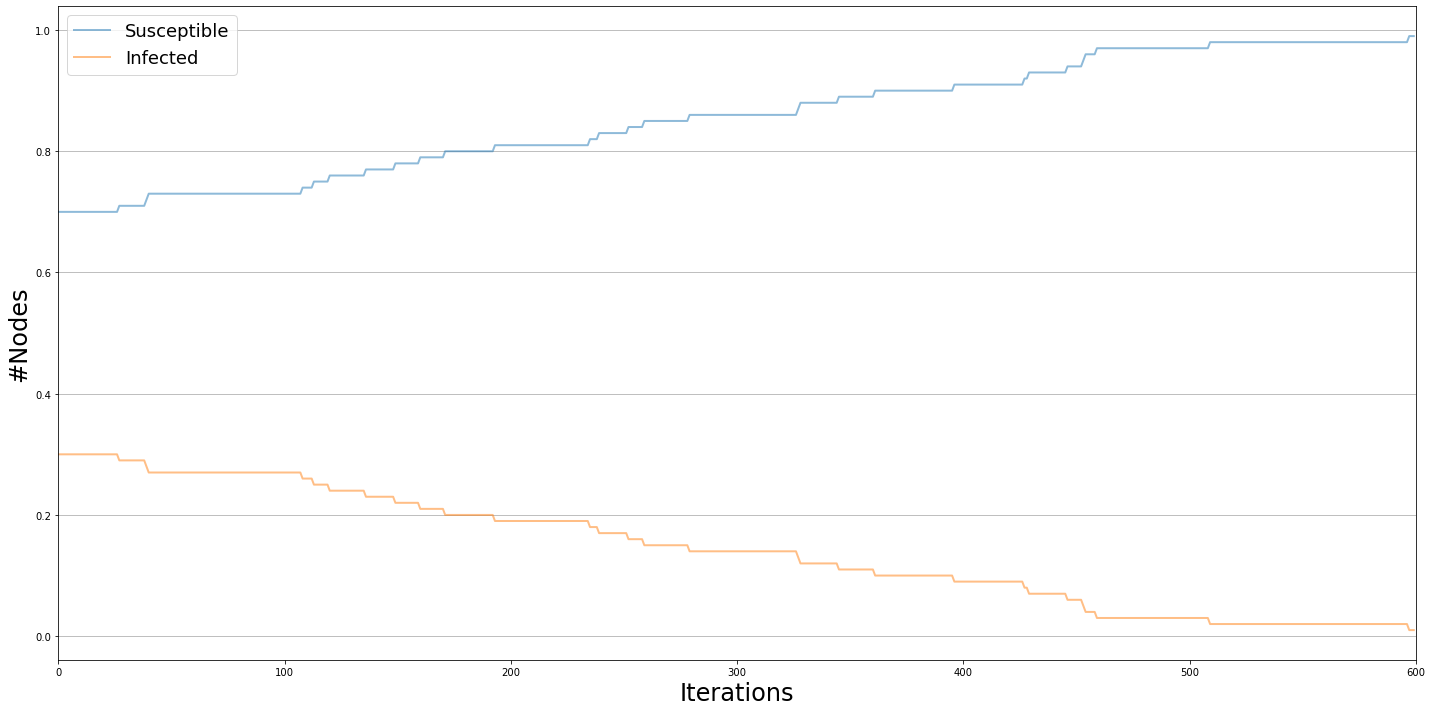

In [10]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="continuos"></a>
## Continuos Opinion models ([to top](#top))

Agents opinions vary in the continous set [0,1]

<a id="deffuant"></a>
### Deffuant ([to top](#top))

Simple model of opinion formation, with bounded confidence

Opinions xi ∈ [0,1] (Continuous values)   

Discrete time steps

Iteration:

Two random individuals interact with bounded confidence 𝝐 (open-mindness)
- xi(t+1) = xj(t+1) = (xi(t)+xj(t))/2 
- only if |xi(t+1)-xj(t+1)| < 𝝐


In [11]:
model = op.AlgorithmicBiasModel(g)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 0)  # No bias = Deffuant
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)

100%|██████████| 100/100 [00:03<00:00, 30.01it/s]


No handles with labels found to put in legend.


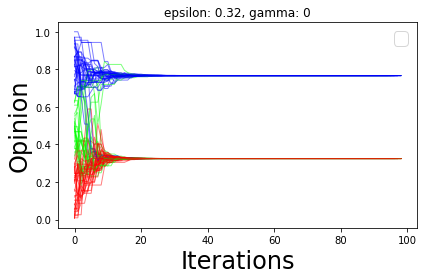

In [12]:
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

<a id="algbias"></a>
### Algorithmic Bias ([to top](#top))

Modified Deffuant model

Probability to select interaction partner depends by
- the opinion distance, dij 
- the bias strength, ɣ

The more similar the opinions, the more likely that the interaction will take place.


In [13]:
model = op.AlgorithmicBiasModel(g)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)

100%|██████████| 100/100 [00:03<00:00, 28.16it/s]


No handles with labels found to put in legend.


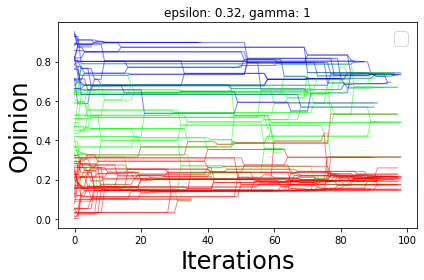

In [14]:
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

<a id="models"></a>
### Available models ([to top](#top))

<a id="opinions"></a>
### 3.B Opinion Dynamics ([to top](#top))

Recent years have witnessed the introduction of a wide range of models that attempt to explain how opinions form in a population, taking into account various social theories (e.g. bounded confidence or social impact).

These models have a lot in common with those seen in epidemics and spreading. In general, individuals are modelled as agents with a state and connected by a social network.

The social links can be represented by a complete graph (*mean field* models) or by more realistic complex networks, similar to epidemics and spreading.

The state is typically represented by variables, that can be *discrete* (similar to the case of spreading), but also *continuous*, representing for instance a probability to choose one option or another. The state of individuals changes in time, based on a set of update rules, mainly through interaction with the neighbours.

While in many spreading and epidemics models this change is irreversible (susceptible to infected), in opinion dynamics the state can oscillate freely between the possible values, simulating thus how opinions change in reality.

In ``NDlib`` are implemented the following 6 Opinion Dynamics models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Voter.html'>Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/QVoter.html'>Q-Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/MajorityRule.html'>Majority Rule</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Snajzd.html'>Sznajd</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/COD.html'>Cognitive Opinion Dynamics</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/AlgorithmicBias.html'>Algorithmic Bias</a></td>
    </tr>
</table>